# Table of Contents

* [Part 1: Graph Theory and Social Networks                                                    ](#chapter1)
* [Chapter 2: Graphs                                                    ](#chapter2)
 * [Exercise: Distance from Node                                                    ](#chapter3)
 * [Advanced Exercise: Distance Distribution                                                    ](#chapter4)
 * [Advanced Exercise: Paths Between Nodes                                                    ](#chapter5)
 * [Exercise: Connected Components                                                    ](#chapter6)
 * [Exercise 2.1: Pivotal                                                  ](#chapter7)
 * [Exercise 2.2: Gatekeeping                                                    ](#chapter8)
 * [Advanced Exercise 2.3: Diameter and Average Distance                                                    ](#chapter9)
* [Chapter 3: Strong and Weak Ties                                                    ](#chapter10)
 * [Exercise: Triadic Closure                                                    ](#chapter11)
 * [Exercise: Clustering Coefficient                                                    ](#chapter12)
 * [Exercise: Bridges                                                    ](#chapter13)
 * [Exercise: Local Bridges                                                    ](#chapter14)
 * [Exercise: Strong Triadic Closure                                                    ](#chapter15)
 * [Exercise: Neighborhood Overlap                                                    ](#chapter16)
 * [Exercise 3.1                                                    ](#chapter17)
 * [Exercise 3.2                                                    ](#chapter18)
 * [Exercise 3.3                                                    ](#chapter19)
 * [Exercise 3.4                                                    ](#chapter20)
 * [Exercise 3.5                                                    ](#chapter21)
* [Chapter 4: Network in their Surrounding Context                                                    ](#chapter22)
 * [Advanced Exercise: Homophily                                                    ](#chapter23)


**<span style="color:red">Example Solutions</span>**

# Part 1: Graph Theory and Social Networks                                                     <a id="chapter1"></a>

This ipython document contains the tutorial exercises for the WebScience module based on Networks, Crowds, and Markets by Easly and Kleinberg 2010. Your task is to solve the Exercises by adding the answers into the designated code or text areas. Some exercises are marked as 'advanced exercises' and are not compulsory to be answered.


In [11]:
# The following includes are needed to work with graphs and display solutions.
apt3 install libgraphviz-dev
pip3 install pygraphviz --quiet
import networkx as nx
from IPython.display import display
from collections import Counter
from utils import *
from graphs import *

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


# Chapter 2: Graphs                                                     <a id="chapter2"></a>


## Exercise: Distance from Node                                                     <a id="chapter3"></a>

* (a) Complete the function ``bfs_distances`` that calculates for given node ``start`` the shortest distance of each node connected to ``start``.

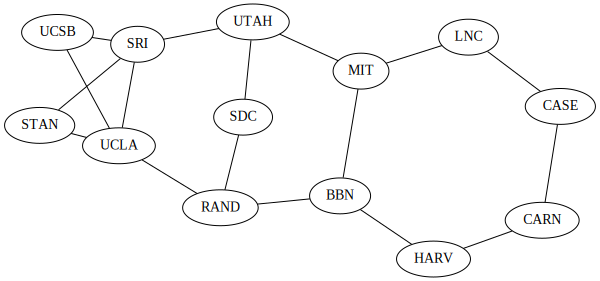

In [12]:
def bfs_distances(G, start):
    ''' 
    breadth first search that calculates the distances from start node 
    The function returns a dictionary mapping node names to distances. 
    '''
    visited, queue = dict(), [(start,0)]
    # BEGIN SOLUTION
    while queue:
        vertex, distance = queue.pop(0)

        if vertex not in visited:
            visited[vertex] = distance
            s = set(G[vertex]) - set(visited)
            queue.extend(map(lambda x: (x,distance+1), s))
    # END SOLUTION
    return visited

# Check
display(draw(F23))
visits = bfs_distances(F23, 'BBN')
answer('CASE' in visits and visits['CASE'] == 3)

## Advanced Exercise: Distance Distribution                                                     <a id="chapter4"></a>
Let H be the distance between two randomly chosen connected nodes in a graph. 

* (a) Complete the function ``distanceDistribution`` to compute the smallest c such that P(H>c)<0.05 holds. 
* (b) What problems will you encounter if you want to use your proposed algorithm on a really large graph such as Facebook.

In [13]:
def distanceDistribution(G):
    '''
    Your task
    '''
    c = 0
    # BEGIN SOLUTION
    from collections import Counter
    c = Counter()
    for n in G.nodes():
        distances = bfs_distances(G, n)
        # remove self references
        del distances[n]
        c.update(distances.values())
    l = list(c.items())
    H,l = zip(*l)
    # cummulative distribution
    l = [ (i, 1.0 - float(sum(l[:i+1])) / sum(l)) for i in range(len(l)) ]
    l = list(filter(lambda x: x[1] < 0.05, l))
    # END SOLUTION
    return l[0][0]+1

# Check
dist = distanceDistribution(F23)
print(dist)
answer(dist == 5)

5


** Answer (b) **: *Add your answer here*

## Advanced Exercise: Paths Between Nodes                                                     <a id="chapter5"></a>

Complete the function ``bfs_paths`` that returns all possible paths in graph 'G' between node 'start' and node 'end'.

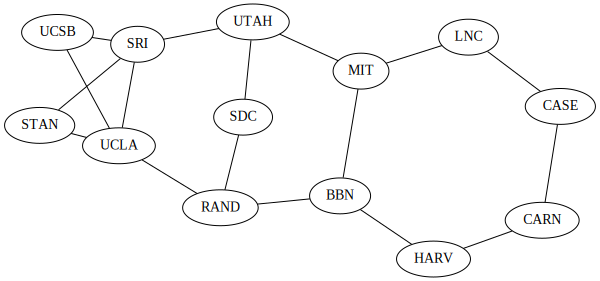

24


In [14]:
def bfs_paths(G, start, end):
    '''
    calculates all paths from start to end
    '''
    paths = []
    # BEGIN SOLUTION
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next in sorted(set(G[vertex]) - set(path)):
            newpath = path + [next]
            if next == end:
                paths.append(newpath)
            else:
                queue.append((next, newpath))
    # END SOLUTION
    return paths

# Check
''' get all paths from 'CARN' to 'UCSB' '''
display(draw(F23))
paths = bfs_paths(F23, 'CARN', 'UCSB')
print(len(paths))
answer(len(paths) == 24)

## Exercise: Connected Components                                                     <a id="chapter6"></a>

* Complete the function ``connected_components`` that returns a list of connected components, which are presented by the lists of its nodes. 


In [15]:
def connected_components(G):
    ''' 
    outputs an list of connectected components (represented by a list of component members)
    '''
    components = []
    # BEGIN SOLUTION
    nodes = list(G.nodes())
    while nodes:
        node = nodes[0]
        visited = bfs(G, node)
        components.append(sorted(visited.keys()))
        nodes = sorted(set(nodes) - set(visited.keys()))   
    # END SOLUTION
    return components

# Check
s = connected_components(F23)
answer(s == [['BBN', 'CARN', 'CASE', 'HARV', 'LNC', 'MIT', 'RAND', 'SDC', 'SRI', 'STAN', 'UCLA', 'UCSB', 'UTAH']])

## Exercise 2.1: Pivotal                                                   <a id="chapter7"></a>

* a) Give an example of a graph in which every node is pivotal for at least one pair of nodes. Explain your answer.

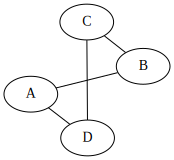

In [16]:
# a)
Answer = fromDot('''
strict graph A {
# BEGIN SOLUTION
A -- B -- C -- D -- A;
# END SOLUTION
}
''')
display(draw(Answer))

**Explanation a:** *add your explanation here*

* b) Give an example of a graph in which every node is pivotal for at least two different pairs of nodes. Explain your answer. 

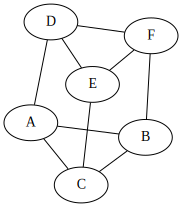

In [17]:
# b
Answer = fromDot('''
strict graph A {
# BEGIN SOLUTION
A -- B -- C -- A;
D -- E -- F -- D;
C -- E;
F -- B;
D -- A;
# END SOLUTION
}
''')
display(draw(Answer))

**Explanation b:** *add your answer here*

## Exercise 2.2: Gatekeeping                                                     <a id="chapter8"></a>


* (p1) A node X is a gatekeeper if for two other nodes Y and Z every path between Y and Z passes throught X. Complete the functions ``gatekeepers`` and ``gatekeeperAB``. The function ``gatekeeperAB`` should return a set of nodes that are on all possible paths between node a and node b. The function ``gatekeepers`` returns the union of all gatekeepers.
* (p2) A node X is a local gate keeper if there are two neighbors of X, say Y and Z, that are not connected to each other. Complete the functions ``local_gatekeeper and ``local_gatekeepers`` below.
* (a) Give an example (with explanation) of a graph in which more than half of all nodes are gatekeepers.
* (b) Give an example (with explanation) of a graph in there are no gatekeepers but in which every node is a local gate keeper.

In [18]:
# p1 + p2
def gatekeeperAB(G, a, b):
    '''
    Determines all gatekeepers between node 'a' and node 'b' 
    '''
    found = set()
    # BEGIN SOLUTION
    if a == b: return set()
    paths = bfs_paths(G, a, b)    
    if not paths: return set()
    if len(paths[0]) < 3: return set()
    found = set(paths[0][1:-1])
    for p in paths[1:]:
        found = found & set(p[1:-1])   
    # END SOLUTION
    return found


def gatekeepers(G):
    '''
    Determines all gatekeepers in graph 'G'
    '''
    result = set()
    for n1 in G:
        for n2 in G:
            result = result | gatekeeperAB(G, n1, n2)
    return result

def local_gatekeeper(G, a):
    '''
    Determines whether a is a local gate keeper
    '''
    # BEGIN SOLUTION
    for n1,n2 in [ (n1,n2) for n1 in G[a] for n2 in G[a] if n1 != n2]:
        if n1 not in G[n2]: return True   
    # END SOLUTION
    return False


def local_gatekeepers(G):
    '''
    Determines all gatekeepers in graph 'G'
    '''
    result = set()
    for n in G:
        if local_gatekeeper(G,n): result.add(n)
    return result

# Check
answer(gatekeepers(F214) == set('A'))
answer(local_gatekeepers(F214) == {'A', 'D'})

In [19]:
# (a)

Answer = fromDot('''
strict graph A {
# BEGIN SOLUTION
A -- B -- C -- D -- E -- F;
# END SOLUTION
}
''')

# Check
answer(len(Answer) / 2 < len(gatekeepers(Answer)))


**Explanation a**: * Add your explanation here* 

In [20]:
# (b)

Answer = fromDot('''
strict graph A {
# BEGIN SOLUTION
A -- B -- C -- D -- E -- F -- A;
# END SOLUTION
}
''')

# Check
answer(len(gatekeepers(Answer)) == 0 and len(local_gatekeepers(Answer)) == len(Answer) and len(Answer)> 0)

**Explanation b**: *Add your explanation here*

## Advanced Exercise 2.3: Diameter and Average Distance                                                     <a id="chapter9"></a>

The diameter of a graph is the maxium distance between any two nodes in this graph. The average distance is, as the term suggests, is the average distance between all pairs of nodes in a graph [p 41].

* (p) Complete the functions ``diameter`` and ``avg_distance``. 
* (a) Give an example of a graph where the diameter of a graph is more than tree times as large as the average distance.
* (b) Describe how you could extend your construction from (a) to produce graphs in which the diameter exceeds the average distance by as large as factor as you would like. That is, for every number c, can you produce a graph in which the diameter is more than c times as large as the average distance

In [21]:
# (p)
def diameter(G):
    '''
    Calculates the diameter of graph
    '''
    d = 0
    # BEGIN SOLUTION
    nodes = list(G.nodes())
    while nodes:
        n = nodes.pop(0)
        visited = bfs_distances(G, n)
        m =  max(visited.values())
        d = max(d,m)
    # END SOLUTION
    return d

def avg_distance(G):
    '''
    '''
    avg = 0
    # BEGIN SOLUTION
    nodes = list(G.nodes())
    d = {}
    while nodes:
        n = nodes.pop(0)
        visited = bfs_distances(G, n)
        del visited[n]
        for v in visited.values():
            d[v] = d.get(v, 0) + 1
    sum = 0.0
    cnt = 0
    for k,v in d.items():
        sum += k * v
        cnt += v
    avg = sum / cnt
    # END SOLUTION
    return avg

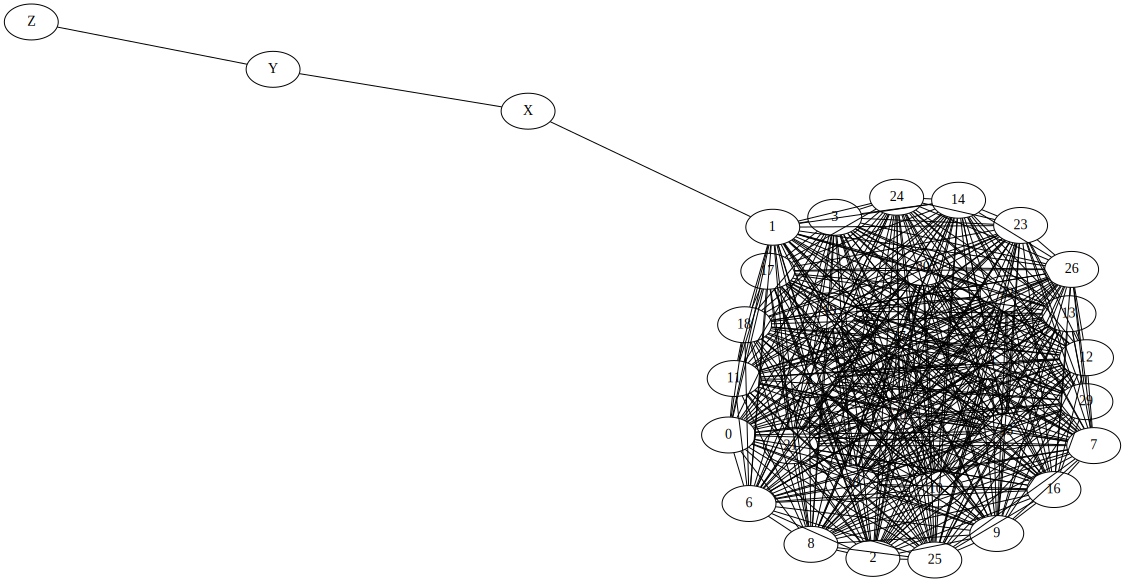

4
1.3279857397504455
3.9839572192513364


In [22]:
# Answer (a)
# Construct a graph where diameter(Answer) > 3 * avg_distance(Answer)
# BEGIN SOLUTION
Answer = nx.complete_graph(31)
Answer.add_edge(1, 'X')
Answer.add_edge('X', 'Y')
Answer.add_edge('Y', 'Z')
# END SOLUTION
display(draw(Answer))
print(diameter(Answer))
print(avg_distance(Answer))
print(3 * avg_distance(Answer))
# Check
answer(diameter(Answer) > 3 * avg_distance(Answer))

**Answer (b)**: *Add your explanation here*

# Chapter 3: Strong and Weak Ties                                                     <a id="chapter10"></a>


## Exercise: Triadic Closure                                                     <a id="chapter11"></a>

If nodes B and C have a neighbor A in common, the formation of an edge between B and C produces a situation in which A,B,C form a triangle. 

* (p1): Complete the functions ``trianglesA`` and  ``triangles``.
* (p2): Complete the function ``open_triangles``.

In [23]:
def trianglesA(G,a):
    '''
    Calculates the number of neighbors of node 'a' that are also neighbors themselves.
    '''
    results = []
    # BEGIN SOLUTION
    for n1, n2 in [ (n1, n2) for n1 in G[a] for n2 in G[a] if n1 > n2 ]:
        if n2 in G[n1]:
            r = tuple(sorted([n1, a, n2]))
            if r not in results: results.append( r )
    # END SOLUTION
    return results

def triangles(G):
    '''
    Calculates all open triangles in graph 'G'
    '''
    results = set()
    # BEGIN SOLUTION
    for n in G.nodes():
        for r in trianglesA(G, n):
           results.add( r )
    # END SOLUTION
    return results

def open_triangles(G):
    '''
    Cacluates the number of triades in graph ``G``.
    '''
    results = []
    # BEGIN SOLUTION
    for n in G.nodes():
        for n1, n2 in [ (n1, n2) for n1 in G[n] for n2 in G[n] if n1 > n2 ]:  
            if n2 not in G[n1]:
                r = tuple(sorted([n1, n, n2]))
                if r not in results: results.append( r )
    # END SOLUTION
    return results

# Check 
answer(len(open_triangles(F31)) == 10)

## Exercise: Clustering Coefficient                                                     <a id="chapter12"></a>
The clustering coefficient of a node 'a' is defined as the probability that two randomly selected neighbors of A are neighbors of each other [p44-45]

* (p): Complete the function ``cluster_coefficient`` to calculate the cluster coefficient of a node 'a'.

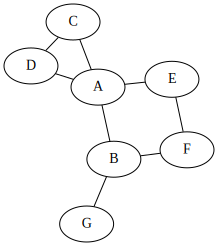

In [24]:
def cluster_coefficient(G, a):
    '''
    Calculate the number of neighbors in a triangle divided by the number of neighbors
    '''
    coef = 0.0
    # BEGIN SOLUTION
    l = len(trianglesA(G,a))
    L = len(G[a])
    coef = 2 * l / float(L)    
    # END SOLUTION
    return coef

# Check
display(draw(F31))
answer(cluster_coefficient(F31, 'C') == 1.0)

## Exercise: Bridges                                                     <a id="chapter13"></a>

An edge between two nodes A and B is called a bridge if deleting the edge would cause A and B to lie in different components of the resulting graph [p 46]

* (p) Complete the function ``bridge`` that checks whehter an edge between a node 'a' and a node 'b' is a bridge. 

In [25]:
def bridge(G, a, b):
    ''' 
    Checks whether an edge between node 'a' and 'b' is a bridge in 'G'.
    '''
    paths = []
    # BEGIN SOLUTION
    if not b in G[a]: return False
    Gprime = G.copy()
    Gprime.remove_edge(a,b)
    paths = bfs_paths(Gprime, a, b)    
    # END SOLUTION
    return not paths

# Check
answer((bridge(F33, 'A', 'B') == True) and (bridge(F33, 'A', 'C') == False))

## Exercise: Local Bridges                                                     <a id="chapter14"></a>

An edge joinging two nodes a and b in a graph is a local bridge if its endpoints have no neighbors (besides themselves) in common 
    
* (p) Complete the function ``local_bridge`` that checks whether an edge between node 'a' and node 'b' forms a local bridge.

In [26]:
def local_bridge(G, a, b):
    '''
    A local bridge is an edge where both ends of the edge have no other neighbor in common. 
    '''
    is_bridge = False
    # BEGIN SOLUTION
    if not b in G[a]: return False
    A = set(G[a]) - set([b])
    B = set(G[b]) - set([a])
    is_bridge = len(A & B) == 0   
    # END SOLUTION
    return is_bridge

# Check
answer(local_bridge(F34, 'A', 'B') == True)

## Exercise: Strong Triadic Closure                                                     <a id="chapter15"></a>

Node A violates the Strong Triadic Closure property if it has strong ties to two other nodes
B and C and there is no edge at all between B and C. A node fulfills the Strong Triadic Closure propoerty  if it does not violate it. [p 49]

* (p) Complete the code of the functions ``violoatStrongTriadicClosure``.

In [27]:
# (p)
def violateStrongTriadicClosure(G,a):
    # BEGIN SOLUTION
    elarge=[(u,v) for (u,v,d) in G.edges(data=True) if isStrong(d) and u==a]
    for e1,e2 in [ (e1,e2) for e1 in elarge for e2 in elarge if e1!=e2 ]:
        if e1[1] not in G[e2[1]]: return True 
    # END SOLUTION
    return False

def strongTriadicClosure(G,a):
    return not violateStrongTriadicClosure(G,a)

# Check
answer(strongTriadicClosure(F35, 'J') == True)
        

## Exercise: Neighborhood Overlap                                                     <a id="chapter16"></a>

* (p) Complete the function ``neighborhood_overlap`` that calculates the overlap between the neighborhoods of a node 'a' and a node 'b'.

In [28]:
def neighborhood_overlap(G, a, b):
    '''
    The neighborhood overlap of two nodes a and b is the fraction of neighbors they have in common divided by the 
    total number of their neighbors.
    '''
    overlap = - 1.0
    # BEGIN SOLUTION
    neighbors_a = set(G[a]) - set([b])
    neighbors_b = set(G[b]) - set([a])
    overlap = float(len(neighbors_a & neighbors_b)) / len(neighbors_a | neighbors_b)
    # END SOLUTION
    return overlap

# Check
answer(neighborhood_overlap(F34, 'C', 'A') == 0.75)

## Exercise 3.1                                                     <a id="chapter17"></a>
In two to three sentences, explain what triadic closure is and how it plays a role in the formation of social networks. You can draw a schematic picture if you find it useful.

** Answer **: * Add your answer here *

## Exercise 3.2                                                     <a id="chapter18"></a>
Consider the graph in Figure 3.21, in which each edge - except the edge connecting nodes B and C - is labeled as a strong tie (S) or a weak tie (W). 

<img src="files/fig321.png">

According to the theory of strong and weak ties, using the Strong Triadic Closure assumption, how would you expect the edge between B and C to be labeled. Give a brief one to three sentence explanation for your answer. 


** Answer **: * Add your answer here *

## Exercise 3.3                                                     <a id="chapter19"></a>
In the social network depicted in Figure 3.22 in which each edge is labeled as either as a strong or weak tie, which nodes satisfy the Strong Triadic Closure property? Provide an explanation for your answer.

<img src="files/fig322.png">

** Answer **: * Add your answer here *

## Exercise 3.4                                                     <a id="chapter20"></a>
In the social network depicted in Figure 3.23 with each edge labeled as either a strong or weak tie, which two nodes violate the Strong Triadic Closure Property? Provide an explanation for your answer.

<img src="files/fig323.png">

** Answer **: * Add your answer here *

## Exercise 3.5                                                     <a id="chapter21"></a>
In the social network depicted in Figure 3.24, with each edge labeled as either a strong or weak tie, which nodes satisfy the Strong Triadic Closure Property from Chapter 3, and which do not? Provide an explanation for your answer.

** Answer **: * Add your answer here *

# Chapter 4: Network in their Surrounding Context                                                     <a id="chapter22"></a>


## Advanced Exercise: Homophily                                                     <a id="chapter23"></a>
For a binary property b, let $r$ be the fraction $r$ of edges where both ends have different values of $b$ and let $p$ be the fraction of nodes with positive value of property $b$ and $q$ be the fraction of nodes with negative value of $b$. If $r$ is significantly less than $2\; p\; q$, then there is evidence of homophily [p.80]. Consider the following graph from Figure 4.2.

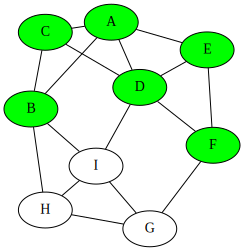

In [29]:
draw(F42)

** Assignment **

* (p) Complete the function ``homophily`` using the property node has fillcolor green (already implemented in the function ``pos``).

In [30]:
# (p)
def pos(G,n):
    return G.nodes()[n].get('fillcolor','green') == 'green'

def homophily(G):
    '''
    '''
    p, q, r = 0, 0, 0
    # BEGIN SOLUTION
    noNodes = len(G.nodes())
    strongNodes = sum( 1 if pos(G,n) else 0 for n in G.nodes())
    weakNodes = noNodes - strongNodes
    p = strongNodes / float(noNodes)
    q = weakNodes / float(noNodes)
    
    noEdges = len(G.edges())
    crossEdges = sum([1 if (pos(G,u)+pos(G,v)==1) else 0 for u,v,d in G.edges(data=True)])
    r = crossEdges / float(noEdges)   
    # END SOLUTION
    return 2 * p * q, r
    
# Check    
answer(homophily(F42) == (0.4444444444444444, 0.25))